### 1. Importing Libraries 

In [3]:
# 'os' module provides functions for interacting with the operating system 
import os

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore") 

### 2. Importing and Exploration of the dataset

In [4]:
# loading the data and setting the unique client_id as the index::

course1 = pd.read_csv('course_1.csv', index_col = 'id')
course2 = pd.read_csv('course_2.csv')

In [5]:
# # showing the first 5 rows of the dataset:
course1.head()

,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
id,,,,,,,,,,,,,,,,
1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [6]:
# To check the Dimensions of the dataset:
course1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   first_name                  2000 non-null   object
 1   last_name                   2000 non-null   object
 2   email                       2000 non-null   object
 3   gender                      2000 non-null   object
 4   part_time_job               2000 non-null   bool  
 5   absence_days                2000 non-null   int64 
 6   extracurricular_activities  2000 non-null   bool  
 7   weekly_self_study_hours     2000 non-null   int64 
 8   career_aspiration           2000 non-null   object
 9   math_score                  2000 non-null   int64 
 10  history_score               2000 non-null   int64 
 11  physics_score               2000 non-null   int64 
 12  chemistry_score             2000 non-null   int64 
 13  biology_score               2000 non-null   int6

In [7]:
# To check the Dimensions of the dataset:
course1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   first_name                  2000 non-null   object
 1   last_name                   2000 non-null   object
 2   email                       2000 non-null   object
 3   gender                      2000 non-null   object
 4   part_time_job               2000 non-null   bool  
 5   absence_days                2000 non-null   int64 
 6   extracurricular_activities  2000 non-null   bool  
 7   weekly_self_study_hours     2000 non-null   int64 
 8   career_aspiration           2000 non-null   object
 9   math_score                  2000 non-null   int64 
 10  history_score               2000 non-null   int64 
 11  physics_score               2000 non-null   int64 
 12  chemistry_score             2000 non-null   int64 
 13  biology_score               2000 non-null   int6

### 3. Checking the datatypes of the columns removing unnecissary columns

In [8]:
course1.dtypes

first_name                    object
last_name                     object
email                         object
gender                        object
part_time_job                   bool
absence_days                   int64
extracurricular_activities      bool
weekly_self_study_hours        int64
career_aspiration             object
math_score                     int64
history_score                  int64
physics_score                  int64
chemistry_score                int64
biology_score                  int64
english_score                  int64
geography_score                int64
dtype: object

In [9]:
course2.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [10]:
course1.drop(labels=["first_name", "last_name", "email", "part_time_job", "absence_days", "extracurricular_activities", "career_aspiration"],
            axis="columns",
            inplace=True)
course1.dtypes

gender                     object
weekly_self_study_hours     int64
math_score                  int64
history_score               int64
physics_score               int64
chemistry_score             int64
biology_score               int64
english_score               int64
geography_score             int64
dtype: object

In [11]:
course2.drop(["race/ethnicity", "parental level of education", "lunch", "test preparation course"],
             axis="columns",
             inplace=True)
course2.dtypes

gender           object
math score        int64
reading score     int64
writing score     int64
dtype: object

### 4. Converting the data types of columns and adding final grades

    - gender from object to category


In [12]:
course1['gender'] = course1['gender'].astype('category')
course2['gender'] = course2['gender'].astype('category')

course1['gender'] = course1['gender'].map({'male': 0, 'female': 1})
course2['gender'] = course2['gender'].map({'male': 0, 'female': 1})

#### Checking the datatypes again:

In [13]:
course2.dtypes

gender           category
math score          int64
reading score       int64
writing score       int64
dtype: object

In [14]:

grade_columns = course1.columns.drop(["gender", "weekly_self_study_hours"])

course1['final_grade'] = course1[grade_columns].mean(axis=1)
course1


,gender,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,final_grade
id,,,,,,,,,,
1,0,27,73,81,93,97,63,80,87,82.000000
2,1,47,90,86,96,100,90,88,90,91.428571
3,1,13,81,97,95,96,65,77,94,86.428571
4,1,3,71,74,88,80,89,63,86,78.714286
5,0,10,84,77,65,65,80,74,76,74.428571
...,...,...,...,...,...,...,...,...,...,...
1996,0,30,83,77,84,73,75,84,82,79.714286
1997,0,20,89,65,73,80,87,67,73,76.285714
1998,1,14,97,85,63,93,68,94,78,82.571429


In [15]:
grade_columns = course2.columns.drop("gender")

course2['final_grade'] = course2[grade_columns].mean(axis=1)
course2

,gender,math score,reading score,writing score,final_grade
0,1,72,72,74,72.666667
1,1,69,90,88,82.333333
2,1,90,95,93,92.666667
3,0,47,57,44,49.333333
4,0,76,78,75,76.333333
...,...,...,...,...,...
995,1,88,99,95,94.000000
996,0,62,55,55,57.333333
997,1,59,71,65,65.000000
998,1,68,78,77,74.333333


### 5. Summary Statistics of the data

In [16]:
# Summary Statistics for Numerical data:
course1.describe()

,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,final_grade
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000,80.980357
std,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705,6.042224
min,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000,59.142857
25%,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000,77.285714
50%,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000,81.000000
75%,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000,84.714286
max,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000,96.142857


### 6. Missing Values

In [17]:
# use isnull().sum() to check for missing values 
course1.isnull().sum() 

gender                     0
weekly_self_study_hours    0
math_score                 0
history_score              0
physics_score              0
chemistry_score            0
biology_score              0
english_score              0
geography_score            0
final_grade                0
dtype: int64

In [18]:
course2.isnull().sum() 


gender           0
math score       0
reading score    0
writing score    0
final_grade      0
dtype: int64

There are no missing values in the data. 

Sk-learn library has an in-built function called Iterative Imputer to impute the missing values. Its sklearn domcumentation: https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

----------------

### 7. Outliers Treatment

To check for the presence of outliers, we plot Boxplot.

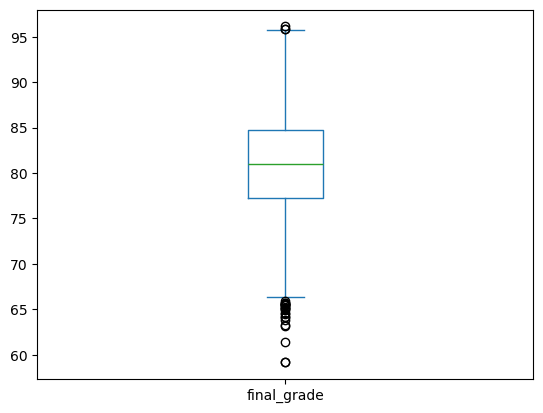

In [19]:
# For loan_amount 
course1['final_grade'].plot(kind='box')
plt.show()

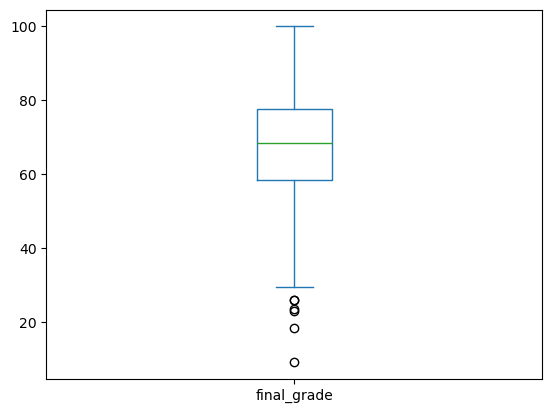

In [20]:
# For rate 
course2['final_grade'].plot(kind='box')
plt.show()

There are a few outliers in these data sets but none impactful enough to remove.

### 8. Transformation

 -Check skewness and kurtosis of data

1. Skewness:

Skewness measures the asymmetry of the data distribution. A skewness close to zero suggests a symmetrical distribution, while positive or negative skewness indicates a distribution that's asymmetrical.
Why it’s important: Many statistical and machine learning models (like linear regression, logistic regression, and many neural networks) perform better with symmetrically distributed data. High skewness can indicate outliers or extreme values that may affect model performance. Transformations like square root, log, or Box-Cox can reduce skewness.

2. Kurtosis:

Kurtosis measures the "tailedness" of the distribution. High kurtosis implies heavy tails or outliers, while low kurtosis suggests lighter tails. A kurtosis near zero (for standardized data) implies a normal-like distribution.
Why it’s important: Distributions with high kurtosis are prone to outliers, which can affect the robustness and accuracy of models. Reducing kurtosis with transformations can help create a more stable dataset for modeling.

In [ ]:
#checking the skewness, kurtosis between the original and transformed data:
print("The skewness of the course 1 data is {}".format(course1.final_grade.skew()))

print('')

print("The kurtosis of the course 1 data is {}".format(course1.final_grade.kurt()))

The skewness of the course 1 data is -0.14235308830821203

The kurtosis of the course 2 data is 0.1789001052811563


In [46]:
#checking the skewness, kurtosis between the original and transformed data:
print("The skewness of the course 2 data is {}".format(course2.final_grade.skew()))

print('')

print("The kurtosis of the course 2 data is {}".format(course2.final_grade.kurt()))

The skewness of the course 2 data is -0.29905711750168584

The kurtosis of the course 2 data is 0.12584287362370628


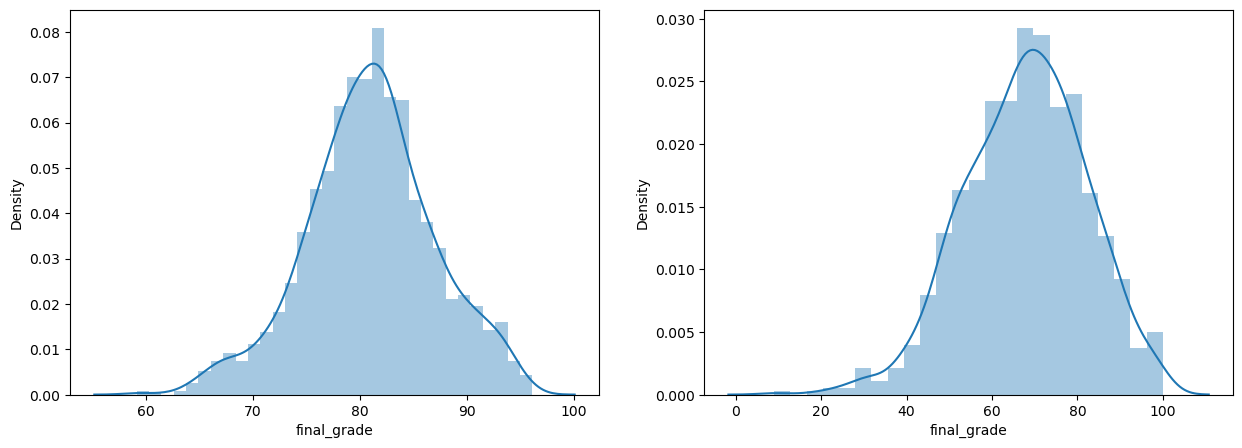

In [23]:
# plotting the distribution

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(course1['final_grade'], ax=axes[0])
sns.distplot(course2['final_grade'], ax=axes[1])

plt.show()


### Result:

the data is normalized no need for tranfomation


There are other transformations available also called BoxCox. There is an inbuilt function in Sci-kit Learn library called PowerTransformer for this which can also be called to transform the data. We'll see how it works below. Its sklearn domcumentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html


-----------

### Outliers Treatment using Capping Approach

### 1) Z-Score approach to treat Outliers:

All the values above 3 standard deviation and below -3 standard deviation are outliers and can be removed

In [71]:
# loading the dataset and setting client id as index

df1 = pd.read_csv('loans.csv', index_col = 'client_id')
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [73]:
# loan_id:

df1['loan_id'] = df1['loan_id'].astype('object')

# repaid:

df1['repaid'] = df1['repaid'].astype('category')

In [74]:
# loan_start:

df1['loan_start'] = pd.to_datetime(df1['loan_start'], format = '%Y-%m-%d')


# loan_end:

df1['loan_end'] = pd.to_datetime(df1['loan_end'], format = '%Y-%m-%d')

In [72]:
# 'SciPy' is used to perform scientific computations
import scipy.stats as stats

#### Using SciPy Library to calculate the Z-Score:

In [78]:
# Creating new variable with Z-score of each record:
df1['ZR'] = stats.zscore(df1['rate'])

In [79]:
df1.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [81]:
# Combined Lower limit and Upper limit:

df1[(df1['ZR']<-3) | (df1['ZR']>3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
client_id,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.037362
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.926916


In [82]:
# count of outliers:

df1[(df1['ZR']<-3) | (df1['ZR']>3)].shape[0]

3

In [83]:
### Cleaned Data: without outliers so z>-3 and z< +3

df2= df1[(df1['ZR']>-3) & (df1['ZR']<3)].reset_index()
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,ZR
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.036399


In [84]:
df1.shape

(443, 8)

In [85]:
df2.shape

(440, 9)

#### Interpretation: 

A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

In [93]:
df3 = df2.copy()

In [97]:
df3.drop(columns = ['ZR'], inplace=True)
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


-----------

### 2) IQR Method to treat Outliers:

All the values below Q1 - 1.5*IQR and values above Q3 + 1.5*IQR are outliers and can be removed.

In [99]:
# finding the Quantiles:

Q1 = df3.rate.quantile(0.25)
Q2 = df3.rate.quantile(0.50)
Q3 = df3.rate.quantile(0.75)

# IQR : Inter-Quartile Range

IQR = Q3 - Q1

# Lower Limit:
LC = Q1 - (1.5*IQR)

# Upper Limit:
UC = Q3 + (1.5*IQR)

display(LC)
display(UC)

-3.9762499999999994

9.87375

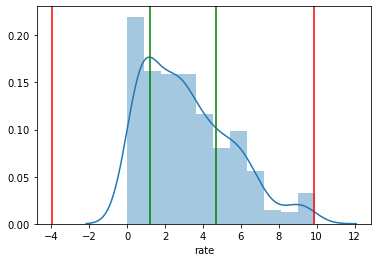

In [100]:
## Plot

sns.distplot(df3.rate)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [101]:
# Find count of Outliers wrt IQR

df3[(df3.rate<LC) | (df3.rate>UC)].reset_index(drop=True)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,39505,cash,11647,1,11928,2003-07-28,2005-12-24,9.91


In [102]:
df3[(df3.rate<LC) | (df3.rate>UC)].shape[0]

1

In [103]:
## Store the clean data wrt IQR:

df4 = df3[(df3.rate>LC) & (df3.rate<UC)]
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [104]:
df3.shape

(440, 8)

In [105]:
df4.shape

(439, 8)

#### Interpretation: 

A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

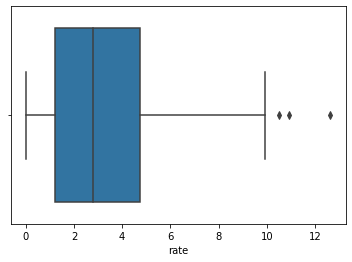

In [112]:
## Box Plot for rate--- based on IQR Method

sns.boxplot(df1.rate)
plt.show()

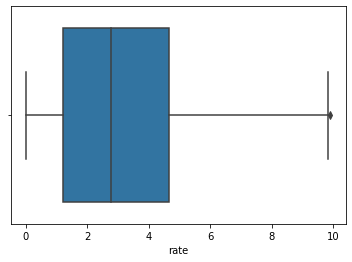

In [110]:
# Box Plot for rate --- based on Z-score cleaned data 

sns.boxplot(df2.rate)
plt.show()

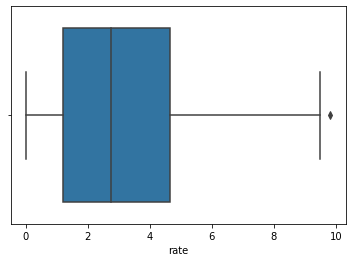

In [108]:
# Box Plot for rate --- based on IQR cleaned data 

sns.boxplot(df4.rate)
plt.show()

-------------------

### 9. Scaling the Numerical Features

There are two ways to scale the data: 

1) Standardization (Z-Score)\
2) Normalization: Min Max Scalar

Both can by done manually as well as have in-built functions in sklearn. Will demonstrate both.

### 9a. Standardization (Z-Score)

Scales the data using the formula (x-mean)/standard deviation

#### Manually:

In [116]:
# for Rate :
avg_rate = df3['rate'].mean()
avg_rate

3.161818181818183

In [117]:
std_rate = df3['rate'].std()
std_rate

2.307947418822915

In [118]:
# Step 1 : transform using Z-score
df3['Z_Score_Rate'] = (df3['rate'] - avg_rate)/std_rate

In [119]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_Rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786


In [121]:
# checking if the skewness and kurtosis post scaling or not:

# For Rate:

print("The skewness for the original data is {}.".format(df3.rate.skew()))
print("The kurtosis for the original data is {}.".format(df3.rate.kurt()))

print('')

print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_Rate.skew()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_Rate.kurt()))

The skewness for the original data is 0.7594062707815686.
The kurtosis for the original data is -0.05964248048746912.

The skewness for the Zscore Scaled column is 0.7594062707815689.
The kurtosis for the Zscore Scaled columns is -0.05964248048746734.


In [133]:
# For Loan_amount:
avg_LA = df3['loan_amount'].mean()
avg_LA

7997.195454545455

In [134]:
std_LA = df3['loan_amount'].std()
std_LA

4179.435966237437

In [138]:
# Step 1 : transform using Z-score
df3['Z_Score_LA'] = (df3['loan_amount'] - avg_LA)/std_LA

In [144]:
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_Rate,Z_Score_LA
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786,1.447996


In [145]:
# checking if the skewness and kurtosis post scaling or not:

# For Loan_amount:

print("The skewness for the original data is {}.".format(df3.loan_amount.skew()))
print("The kurtosis for the original data is {}.".format(df3.loan_amount.kurt()))

print('')

print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_LA.skew()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_LA.kurt()))

The skewness for the original data is -0.04678765472024289.
The kurtosis for the original data is -1.2354309429278456.

The skewness for the Zscore Scaled column is -0.04678765472024289.
The kurtosis for the Zscore Scaled columns is -1.2354309429278456.


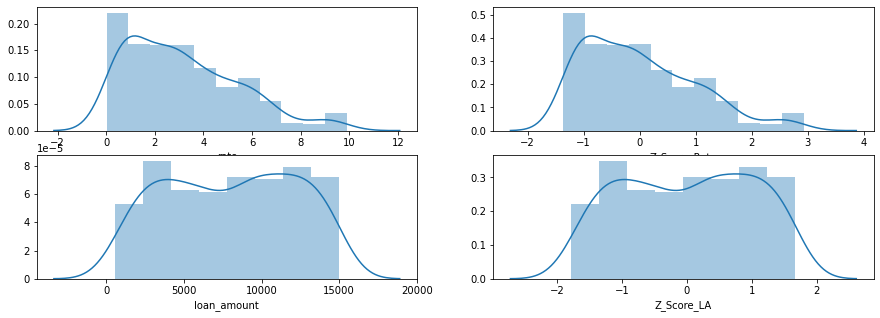

In [147]:
# Distribution of the columns

fig, axes = plt.subplots(2,2, figsize=(15,5))

sns.distplot(df3['rate'], ax=axes[0,0])
sns.distplot(df3['Z_Score_Rate'], ax=axes[0,1])
sns.distplot(df3['loan_amount'], ax=axes[1,0])
sns.distplot(df3['Z_Score_LA'], ax=axes[1,1])


plt.show()

The only difference between the two curves is of the Range on the x-axis. The impact of scaling on data is:
Skewness, Kurtosis and Distribution all remain same.

The need for Scaling is :

1) Comparison between variables is easier\
2) Computation power is more efficient and less time consuming.

#### By SkLearn:

Documentation for Standard Scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [125]:
# Loans data:

df4 = df3.copy()
df4.drop(columns = ['Z_Score_Rate'], inplace=True)
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [129]:
from sklearn.preprocessing import StandardScaler

In [128]:
df4_num = df[['loan_amount','rate']]
df4_num.head()

,loan_amount,rate
client_id,,
46109,13672,2.15
46109,9794,1.25
46109,12734,0.68
46109,12518,1.24
46109,14049,3.13


In [130]:
SS = StandardScaler()

scaled_x = SS.fit_transform(df4_num)
scaled_x

array([[ 1.36502962e+00, -4.45676908e-01],
       [ 4.34647423e-01, -8.21544457e-01],
       [ 1.13999132e+00, -1.05959390e+00],
       [ 1.08817014e+00, -8.25720763e-01],
       [ 1.45547678e+00, -3.63989115e-02],
       [-2.51263533e-01, -5.33379336e-01],
       [-4.33117505e-01,  2.61555546e+00],
       [ 1.12127812e+00,  3.85408004e-01],
       [ 7.38856969e-01,  9.45033020e-01],
       [-9.43412224e-01,  4.35523677e-01],
       [-1.52688038e+00,  1.36683993e+00],
       [ 1.01648330e-01, -1.13476741e+00],
       [ 2.57831622e-01, -9.84420394e-01],
       [-1.06960640e+00,  1.15384832e+00],
       [ 6.88715175e-01, -1.65864400e-01],
       [-1.54338725e-01, -8.04839232e-01],
       [ 9.52619355e-01,  3.45982920e-02],
       [ 5.00143642e-01, -4.05752176e-02],
       [ 9.66054477e-01, -1.01365454e+00],
       [-1.78094813e+00,  3.89584310e-01],
       [ 1.20620728e+00, -5.33379336e-01],
       [-9.91154890e-01, -1.00530192e+00],
       [ 1.04767198e-01, -9.96949312e-01],
       [ 9.

### 6b.  Normalization: Min Max Scalar

Scales the data using the formula (x - min)/(max - min)

#### Manually:

In [131]:
# ForeRate:
min_rate = df4.rate.min()
min_rate

0.01

In [132]:
max_rate = df4.rate.max()
max_rate

9.91

In [151]:
df4['Min_Max_R'] = (df4['rate'] - min_rate)/ (max_rate - min_rate)

In [158]:
# checking if the skewness and kurtosis post scaling or not:

# For Rate:

print("The skewness for the original data is {}.".format(df4.rate.skew()))
print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_Rate.skew()))
print("The skewness for the Min Max Scaled Data is {}.".format(df4.Min_Max_R.skew()))


print('')

print("The kurtosis for the original data is {}.".format(df4.rate.kurt()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_Rate.kurt()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(df4.Min_Max_R.kurt()))

The skewness for the original data is 0.7594062707815686.
The skewness for the Zscore Scaled column is 0.7594062707815689.
The skewness for the Min Max Scaled Data is 0.7594062707815686.

The kurtosis for the original data is -0.05964248048746912.
The kurtosis for the Zscore Scaled columns is -0.05964248048746734.
The kurtosis for the Min Max Scaled Data is -0.05964248048746823.


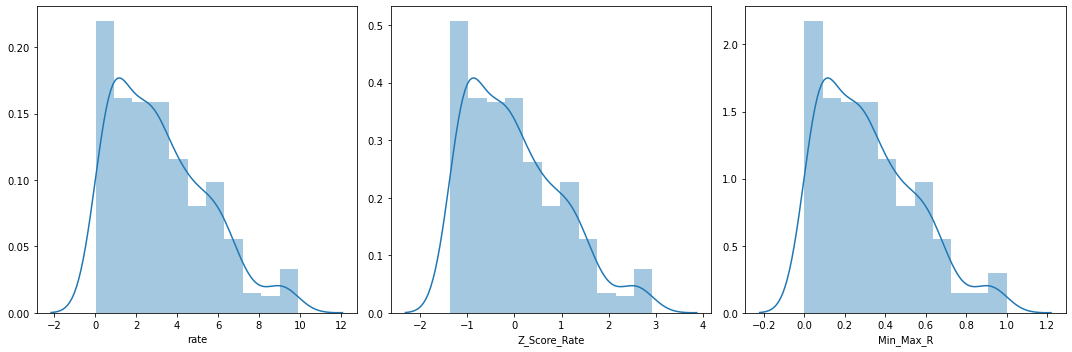

In [162]:
# Distribution of the columns

# For Rate

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df3['rate'], ax=axes[0])
sns.distplot(df3['Z_Score_Rate'], ax=axes[1])
sns.distplot(df4['Min_Max_R'], ax=axes[2])

plt.tight_layout()
plt.show()

In [153]:
# For Loan_amount:
min_LA = df4.loan_amount.min()
min_LA

559

In [154]:
max_LA = df4.loan_amount.max()
max_LA

14971

In [155]:
df4['Min_Max_LA'] = (df4['loan_amount'] - min_LA)/ (max_LA - min_LA)

In [160]:
# checking if the skewness and kurtosis post scaling or not:

# For Rate:

print("The skewness for the original data is {}.".format(df4.loan_amount.skew()))
print("The skewness for the Zscore Scaled column is {}.".format(df3.Z_Score_LA.skew()))
print("The skewness for the Min Max Scaled Data is {}.".format(df4.Min_Max_LA.skew()))


print('')

print("The kurtosis for the original data is {}.".format(df4.loan_amount.kurt()))
print("The kurtosis for the Zscore Scaled columns is {}.".format(df3.Z_Score_LA.kurt()))
print("The kurtosis for the Min Max Scaled Data is {}.".format(df4.Min_Max_LA.kurt()))

The skewness for the original data is -0.04678765472024289.
The skewness for the Zscore Scaled column is -0.04678765472024289.
The skewness for the Min Max Scaled Data is -0.04678765472024256.

The kurtosis for the original data is -1.2354309429278456.
The kurtosis for the Zscore Scaled columns is -1.2354309429278456.
The kurtosis for the Min Max Scaled Data is -1.2354309429278452.


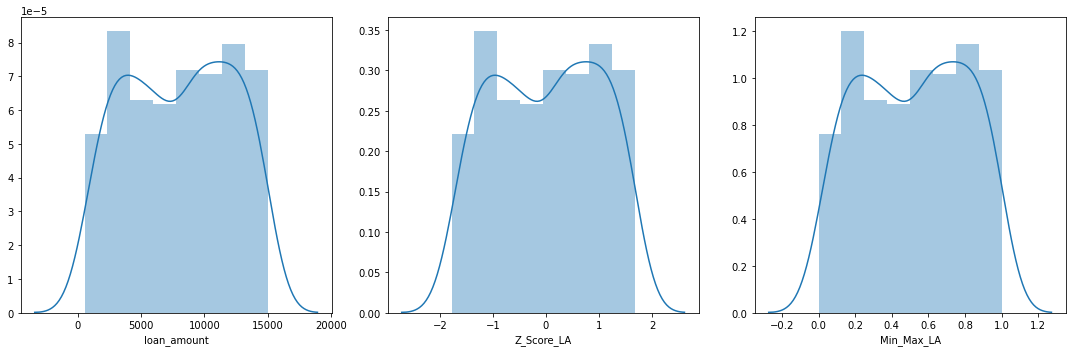

In [161]:
# Distribution of the columns

# For Loan_Amount

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df3['loan_amount'], ax=axes[0])
sns.distplot(df3['Z_Score_LA'], ax=axes[1])
sns.distplot(df4['Min_Max_LA'], ax=axes[2])

plt.tight_layout()
plt.show()

#### By Sklearn:

Documentation for Min Max Scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [149]:
from sklearn.preprocessing import MinMaxScaler

In [150]:
MS = MinMaxScaler()

MinMaxScaled = MS.fit_transform(df4_num)
MinMaxScaled

array([[9.09866778e-01, 1.69706582e-01],
       [6.40785457e-01, 9.83346550e-02],
       [8.44782126e-01, 5.31324346e-02],
       [8.29794616e-01, 9.75416336e-02],
       [9.36025534e-01, 2.47422680e-01],
       [4.42409104e-01, 1.53053132e-01],
       [3.89814044e-01, 7.50991277e-01],
       [8.39369969e-01, 3.27517843e-01],
       [7.28767694e-01, 4.33782712e-01],
       [2.42228698e-01, 3.37034100e-01],
       [7.34804330e-02, 5.13877875e-01],
       [5.44476825e-01, 3.88580492e-02],
       [5.89647516e-01, 6.74068200e-02],
       [2.05731335e-01, 4.73433783e-01],
       [7.14265890e-01, 2.22839017e-01],
       [4.70441299e-01, 1.01506741e-01],
       [7.90591174e-01, 2.60904044e-01],
       [6.59728004e-01, 2.46629659e-01],
       [7.94476825e-01, 6.18556701e-02],
       [0.00000000e+00, 3.28310864e-01],
       [8.63932834e-01, 1.53053132e-01],
       [2.28420760e-01, 6.34417129e-02],
       [5.45378851e-01, 6.50277557e-02],
       [7.79905634e-01, 5.16256939e-01],
       [6.843602

### Few things to keep in mind:

With Scaling all three - Skewness, Kurtosis and distribution remain same so there is no impact on outliers as well.

------------------

### 10. Encoding the Categorical Features

There are two ways to encode the categorical data into dummyvariables. Using: 

1) pd.get_dummies\
2) sklearn's in-built function of OneHotEncoder and LabelEncoder

In [180]:
# Loans data:

df_loans = df3.copy()

In [181]:
df_loans.drop(columns = ['Z_Score_Rate'], inplace=True)
df_loans.drop(columns = ['Z_Score_LA'], inplace=True)

In [182]:
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [183]:
df_loans.dtypes

client_id               int64
loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [188]:
# Repaid is also a categoriy columns and creating dummies for loan_type
df_loans.repaid.head()

0    0
1    0
2    1
3    1
4    1
Name: repaid, dtype: category
Categories (2, int64): [0, 1]

### 1) pd.get_dummies approach:

In [244]:
dummy_cat = pd.get_dummies(df_loans['loan_type'], drop_first = True)
dummy_cat.head()

# drop_first = True drops the first column for each feature

,credit,home,other
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,0
4,1,0,0


### 2. OneHot Encoding

Documentation for this: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [189]:
from sklearn.preprocessing import OneHotEncoder

In [191]:
OE_tips = OneHotEncoder(drop ='first').fit(df_loans[['loan_type']])
OE_tips.categories_

[array(['cash', 'credit', 'home', 'other'], dtype=object)]

### 3. Label Encoding

Documentation for this: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [192]:
from sklearn.preprocessing import LabelEncoder

In [193]:
LE = LabelEncoder()

LE_tips = LE.fit(df_loans[['loan_type']])

In [194]:
LE_tips.classes_

array(['cash', 'credit', 'home', 'other'], dtype=object)

In [196]:
# transform any new values to Dummy variables via Label Encoder
LE_tips.transform(['other', 'cash', 'home', 'credit'])

array([3, 0, 2, 1], dtype=int64)

In [197]:
# Inverse transform to get original values from the dummy variables:
LE_tips.inverse_transform([1,2,3,0])

array(['credit', 'home', 'other', 'cash'], dtype=object)

----------------

### 11. Creating new Derived Features

We can use the loan_start and loan_end features to calculate the tenure of the loan

In [218]:
import datetime as dt

In [219]:
df_loans['loan_tenure'] =  df_loans['loan_end'] - df_loans['loan_start']

In [220]:
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613 days
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635 days
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519 days
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879 days
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684 days


In [221]:
df_loans.dtypes

client_id                int64
loan_type               object
loan_amount              int64
repaid                category
loan_id                 object
loan_start      datetime64[ns]
loan_end        datetime64[ns]
rate                   float64
loan_tenure    timedelta64[ns]
dtype: object

The number of days in the tenure are currently in TimeDelta, we want it integer hence will do the conversion as follows:

In [226]:
df_loans['loan_tenure'] = df_loans['loan_tenure'].dt.days
df_loans['loan_tenure']

0      613
1      635
2      519
3      879
4      684
      ... 
435    928
436    511
437    948
438    633
439    638
Name: loan_tenure, Length: 440, dtype: int64

In [228]:
## Tenure in number of Years:

df_loans['loan_tenure'] = df_loans['loan_tenure']/365
df_loans['loan_tenure']

0      1.679452
1      1.739726
2      1.421918
3      2.408219
4      1.873973
         ...   
435    2.542466
436    1.400000
437    2.597260
438    1.734247
439    1.747945
Name: loan_tenure, Length: 440, dtype: float64

### 12. Training and Testing data

Documentation for this: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [198]:
from sklearn.model_selection import train_test_split

In [229]:
## Splitting for X and Y variables:

Y = df_loans['loan_amount']
X = df_loans.drop('loan_amount', axis=1)

In [230]:
# Independent Variable

X.head()

,client_id,loan_type,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
0,46109,home,0,10243,2002-04-16,2003-12-20,2.15,1.679452
1,46109,credit,0,10984,2003-10-21,2005-07-17,1.25,1.739726
2,46109,home,1,10990,2006-02-01,2007-07-05,0.68,1.421918
3,46109,cash,1,10596,2010-12-08,2013-05-05,1.24,2.408219
4,46109,credit,1,11415,2010-07-07,2012-05-21,3.13,1.873973


In [231]:
# Dependent or Target Variable

Y.head()

0    13672
1     9794
2    12734
3    12518
4    14049
Name: loan_amount, dtype: int64

In [240]:
## Splitting dataset into 80% Training and 20% Testing Data:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state =0)

# random_state ---> is seed -- fixing the sample selection for Training & Testing dataset

# check the dimensions of the train & test subset for 

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (352, 8)
The shape of X_test is: (88, 8)

The shape of Y_train is: (352,)
The shape of Y_test is: (88,)


To statistically test if the train and test representative of the overall data, would compute the Median for the independent variables for both the test and train sets.

In [241]:
# median for y_train
median_y_train = Y_train.median()

# median for y_test
median_y_test = Y_test.median()

In [242]:
print('The median for Y Train variables is:',median_y_train)

The median for Y Train variables is: 8412.5


In [243]:
print('The median for Y Test variables is:',median_y_test)

The median for Y Test variables is: 7673.0


### Conclusion:

Based on the above result, we can conclude statistically that the train and test representative of the overall data as the median for both y_train and y_test are similar.

-----------------